### 데이터 로드 및 전처리

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [2]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(X_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(X_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(X_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(X_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [4]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

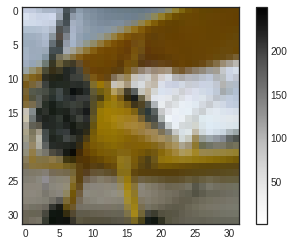

In [6]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.show()

In [8]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [10]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
X_train = X_train.reshape(-1, 3_072)
X_val = X_val.reshape(-1, 3_072)
X_test = X_test.reshape(-1, 3_072)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [11]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
X_train = X_train / 255.
X_val = X_val / 255.
X_test = X_test / 255.

In [12]:
### 모델 구성 및 컴파일

In [24]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
# [[YOUR CODE]]

model = models.Sequential([
    layers.Input(shape=(3072,)),
    
    layers.Dense(128),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dropout(0.5),
    
    layers.Dense(64),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dropout(0.5),
    
    layers.Dense(10, activation="softmax"),
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               393344    
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)               512       
_________________________________________________________________
activation_5 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_6 (Batch (None, 64)                256       
_________________________________________________________________
activation_6 (Activation)    (None, 64)               

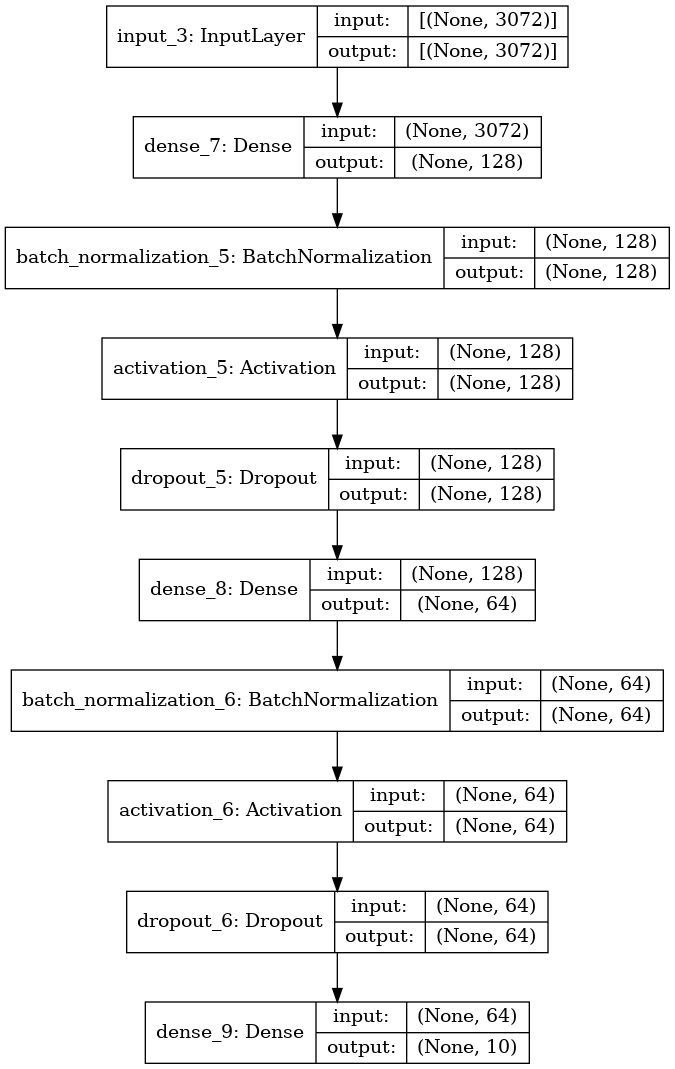

In [26]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

### 모델 학습

In [27]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model_checkpoint = ModelCheckpoint("cifar10_model.keras", 
                                   save_best_only=True)
early_stopping = EarlyStopping(patience=5, 
                               monitor="val_loss", 
                               restore_best_weights=True)

history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=100, batch_size=64,
                    callbacks=[model_checkpoint, early_stopping])

Epoch 1/100
625/625 [==============================] - 3s 4ms/step - loss: 2.0715 - accuracy: 0.2643 - val_loss: 1.7880 - val_accuracy: 0.3651
Epoch 2/100
625/625 [==============================] - 2s 3ms/step - loss: 1.8448 - accuracy: 0.3318 - val_loss: 1.7578 - val_accuracy: 0.3720
Epoch 3/100
625/625 [==============================] - 2s 3ms/step - loss: 1.7814 - accuracy: 0.3624 - val_loss: 1.7674 - val_accuracy: 0.3635
Epoch 4/100
625/625 [==============================] - 2s 3ms/step - loss: 1.7476 - accuracy: 0.3729 - val_loss: 1.6864 - val_accuracy: 0.4096
Epoch 5/100
625/625 [==============================] - 2s 3ms/step - loss: 1.7047 - accuracy: 0.3901 - val_loss: 1.6681 - val_accuracy: 0.4064
Epoch 6/100
625/625 [==============================] - 2s 3ms/step - loss: 1.6910 - accuracy: 0.3976 - val_loss: 1.6458 - val_accuracy: 0.4132
Epoch 7/100
625/625 [==============================] - 2s 3ms/step - loss: 1.6727 - accuracy: 0.4049 - val_loss: 1.6330 - val_accuracy: 0.4316

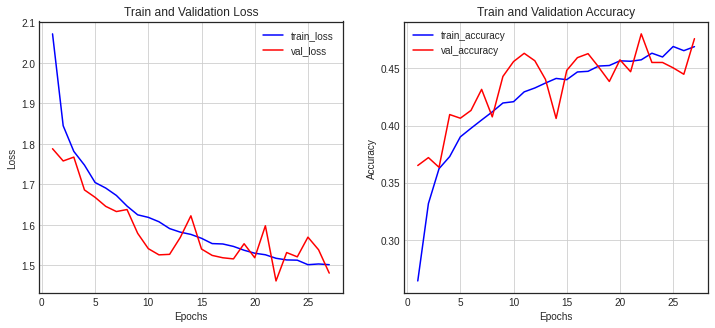

In [28]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
# [[YOUR CODE]]
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 및 예측

In [29]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4580 - accuracy: 0.4805


[1.4579592943191528, 0.4805000126361847]